<a href="https://colab.research.google.com/github/usaidahmed01/Machine-Learning/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Randomly features and rows and columns pick karta hai or bht saare trees hotein hain isliye randomforest.
# har tree ko same data nahi milega cuz of randomization
# if one tree makes mistakes other will cover
# ensemble learning: The average or majority vote smooths out errors.

# trees usually 100 (n_estimator)
# we dont need to scaled or normalize the data in trees
# all trees are independent to eachother

# Every tree trains on a random sample (about 2/3 of the data).  The remaining 1/3 is left out - that is out of bag data.
# Each tree


In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv')
df.head()
df.shape


(303, 14)

In [3]:
X = df.drop('target' , axis= 1)
y = df['target']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# model = RandomForestClassifier(n_estimators=1000, random_state=42) # esitimators means: no of Trees that will enhance the accuracy also it has max_depth, min_samples_leaf, min_samples_split

#OR

model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5 , min_samples_leaf= 5 , min_samples_split= 10)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [6]:
y_pred = model.predict(X_test)

In [7]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.8688524590163934


In [8]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train , y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
model_DT.predict(X_test)
print("Accuracy: " , model_DT.score(X_test, y_test))

Accuracy:  0.7540983606557377


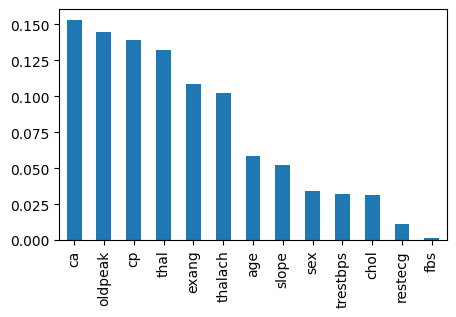

In [10]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind= 'bar', figsize=(5,3))
plt.show()

In [11]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)
print("oob score:", rf.oob_score_)

oob score: 0.8347107438016529


In [13]:
# used for cross Validation
from sklearn.model_selection import GridSearchCV
param_grid = { 'n_estimators' : [50 , 100 , 200],
              'max_depth' : [4 , 6 , 8 , None]} # hyper parameters
grid = GridSearchCV(rf , param_grid , cv = 3) # 3 fold cross validation
# means training data will break in three parts. 2 parts for training and 1 part for testing (randomly pick 3 times)
grid.fit(X_train , y_train)
print(grid.best_params_)


{'max_depth': 4, 'n_estimators': 200}
